# Regression Week 3: Assessing Fit (polynomial regression)

In [1]:
import pandas as pd

In [71]:
tmp = pd.DataFrame([1., 2., 3.], columns=['power_1'])
tmp_cubed = tmp.apply(lambda x: x**3)
tmp_cube = tmp*tmp*tmp
print(tmp)
print (tmp_cubed)
print (tmp_cube)

   power_1
0      1.0
1      2.0
2      3.0
   power_1
0      1.0
1      8.0
2     27.0
   power_1
0      1.0
1      8.0
2     27.0


In [69]:
tmp_cb = pd.DataFrame()

In [76]:
tmp_cb['two'] = tmp_cubed
print(tmp_cb)

   one   two
0  1.0   1.0
1  2.0   8.0
2  3.0  27.0


In [77]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [78]:
print(polynomial_sframe(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Visualizing polynomial regression

In [80]:
kc_test = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_test_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_train = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_train_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_validation = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_valid_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [82]:
kc_1 = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_set_1_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_2 = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_set_2_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_3 = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_set_3_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_4 = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_set_4_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [90]:
kc_train = kc_train.sort_values(by = ['sqft_living', 'price'])

In [95]:
poly1_data = polynomial_sframe(kc_train['sqft_living'], 1)
output = kc_train['price'] # add price to the data since it's the target

In [93]:
from sklearn import linear_model

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
model = linear_model.base.LinearRegression(fit_intercept=True)
regr = model.fit(poly1_data, output)

In [97]:
# The coefficients
print('Slope:', regr.coef_, '\nIntercept:', regr.intercept_)

Slope: [ 288.59846375] 
Intercept: -59493.3171652


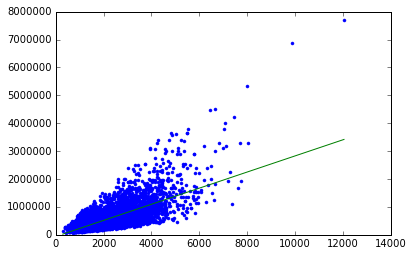

In [98]:
plt.plot(poly1_data['power_1'],output,'.',
        poly1_data['power_1'], regr.predict(poly1_data),'-')

Slope: [ 1.22673842  0.0522949 ] 
Intercept: 267506.280132


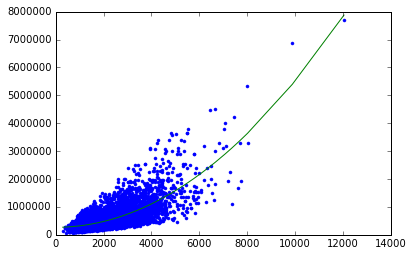

In [105]:
poly2_data = polynomial_sframe(kc_train['sqft_living'], 2)
my_features = poly2_data.columns.values
model = linear_model.base.LinearRegression(fit_intercept=True)
regr2 = model.fit(poly2_data, output)
print('Slope:', regr2.coef_, '\nIntercept:', regr2.intercept_)
plt.plot(poly2_data['power_1'],output,'.',
        poly2_data['power_1'], regr2.predict(poly2_data),'-')

Slope: [  7.50292074e+00   5.03063603e-02   1.67090667e-07] 
Intercept: 262170.64834


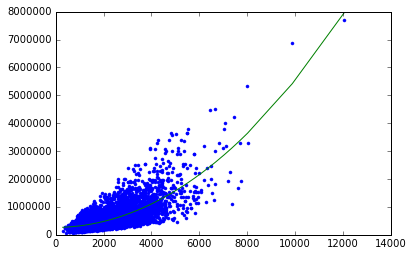

In [106]:
poly3_data = polynomial_sframe(kc_train['sqft_living'], 3)
my_features = poly3_data.columns.values
model = linear_model.base.LinearRegression(fit_intercept=True)
regr3 = model.fit(poly3_data, output)
print('Slope:', regr3.coef_, '\nIntercept:', regr3.intercept_)
plt.plot(poly3_data['power_1'],output,'.',
        poly3_data['power_1'], regr3.predict(poly3_data),'-')

Slope: [  3.65649652e-89   1.15010360e-48  -2.25604713e-55   3.98272978e-59
   3.04293598e-73   8.36182560e-70   5.73133489e-66   3.83786524e-62
   2.47884969e-58   1.51269750e-54   8.40594099e-51   3.93663091e-47
   1.24240972e-43  -2.25041880e-47   1.01236550e-51] 
Intercept: 534979.812425


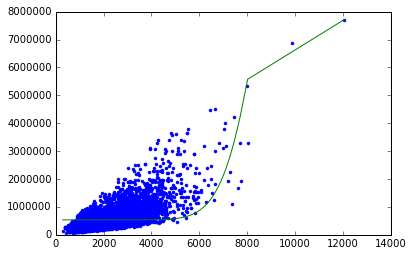

In [107]:
poly15_data = polynomial_sframe(kc_train['sqft_living'], 15)
my_features = poly15_data.columns.values
model = linear_model.base.LinearRegression(fit_intercept=True)
regr15 = model.fit(poly15_data, output)
print('Slope:', regr15.coef_, '\nIntercept:', regr15.intercept_)
plt.plot(poly15_data['power_1'],output,'.',
        poly15_data['power_1'], regr15.predict(poly15_data),'-')

# Changing the data and re-learning

In [111]:
def poly_model(dataset):
    poly15_data1 = polynomial_sframe(dataset['sqft_living'], 15)
    output1 = dataset['price'] # add price to the data since it's the target
    model = linear_model.base.LinearRegression(fit_intercept=True)
    regr15_1 = model.fit(poly15_data1, output1)
    print('Slope:', regr15_1.coef_, '\nIntercept:', regr15_1.intercept_)
    plt.plot(poly15_data1['power_1'],output1,'.',
        poly15_data1['power_1'], regr15_1.predict(poly15_data1),'-')

Slope: [  3.05794168e-90   3.37691163e-49   4.20356001e-55   9.95682444e-60
   3.23082736e-74   1.10358333e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52] 
Intercept: 539058.818669


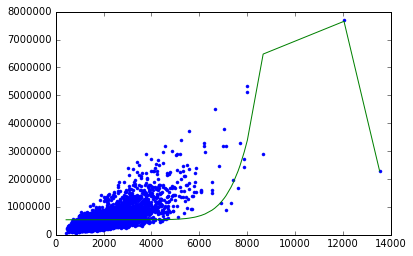

In [112]:
poly_model(kc_1)

Slope: [  2.68007778e-77  -1.28312875e-39   2.29444790e-45  -1.74073488e-49
   5.68029161e-71   1.35479899e-58   3.62847969e-55   1.49807492e-51
   5.73974473e-48   1.95158345e-44   5.37897076e-41   9.38035597e-38
  -3.62478337e-41   4.63968392e-45  -1.96500572e-49] 
Intercept: 506811.840973


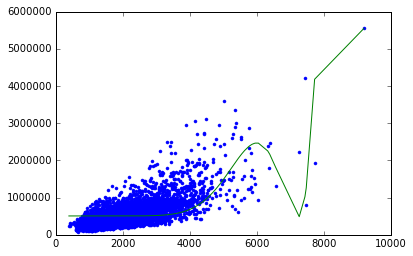

In [113]:
poly_model(kc_2)

Slope: [  2.83751934e-88   1.17220381e-48   1.06395087e-55  -7.96545956e-59
   1.57170169e-72   4.27894908e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51] 
Intercept: 530874.316653


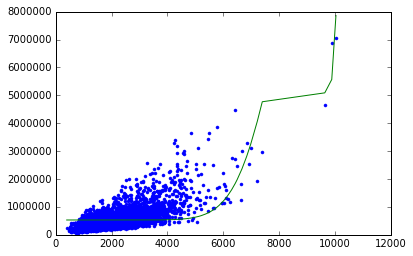

In [114]:
poly_model(kc_3)

Slope: [  1.37128601e-76  -4.21258477e-39   2.99931985e-44   2.74827003e-49
   4.17619486e-53   5.32307788e-58   1.27061353e-54   4.87824476e-51
   1.73529590e-47   5.46986988e-44   1.39567134e-40   2.25005676e-37
  -9.43802328e-41   1.31552210e-44  -6.09068656e-49] 
Intercept: 494812.049321


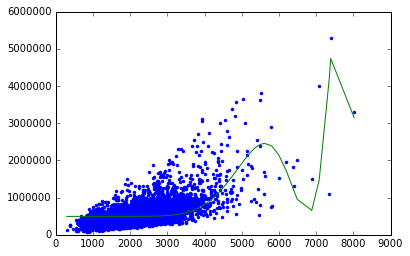

In [115]:
poly_model(kc_4)

# Selecting a Polynomial Degree

In [124]:
def poly_model_new(train_dataset, validation_dataset, degree):
    poly15_data1 = polynomial_sframe(train_dataset['sqft_living'], degree)
    output1 = train_dataset['price'] # add price to the data since it's the target
    poly15_data_val = polynomial_sframe(validation_dataset['sqft_living'], degree)
    output_val = validation_dataset['price'] # add price to the data since it's the target
    model = linear_model.base.LinearRegression(fit_intercept=True)
    regr15_1 = model.fit(poly15_data1, output1)
    residuals = regr15_1.predict(poly15_data_val) - output_val
    RSS = sum(residuals**2)
    return(RSS)

In [132]:
RSS = {}
for i in range(1, 15+1):
    RSS[i] = poly_model_new(kc_train, kc_validation, i)

In [139]:
RSS

{1: 629097886299587.75,
 2: 623955062706519.25,
 3: 625820280251935.13,
 4: 629987335742094.25,
 5: 628218452521870.38,
 6: 566268690267442.25,
 7: 1073848082453169.6,
 8: 7087776140719131.0,
 9: 45295984306083240.0,
 10: 2.4697460063899802e+17,
 11: 1.1927366275897989e+18,
 12: 5.2191726308708209e+18,
 13: 7.6162300212825856e+17,
 14: 2.2975609249245304e+18,
 15: 6.9550380964468204e+18}

In [136]:
min(RSS.items(), key=lambda x: x[1]) 

(6, 566268690267442.25)

In [137]:
poly_model_new(kc_train, kc_test, 6)

135225114233501.36